In [1]:
import pandas as pd
import os

def filter_and_concate(filepath):
    df = pd.read_csv(filepath,index_col=0)
    return df[df.columns[-1]]
    
def get_all_csv_filename(data_dir):
    res = []
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith('.csv'):
                res.append(f"{root}/{file}")
    return res

def reset(df):
    """设置列为训练迭代进度"""
    maxx = max([int(col) for col in df.columns])
    cols = [round(100*int(col)/maxx) for col in df.columns]
    df.columns = cols
    return df

def process(data_dir):
    all_csv_filepath = get_all_csv_filename(data_dir)
    final_df = None
    for filepath in all_csv_filepath:
        tmp_df = filter_and_concate(filepath)
        if final_df is None:
            final_df = tmp_df
        else:
            final_df = pd.concat([final_df,tmp_df],axis=1)

    new_cols = [col.split("_")[-1].replace("final","").replace("8b","0") for col in final_df.columns]
    final_df.columns = new_cols

    new_index = [idx.split("_")[-1] for idx in final_df.index]
    final_df.index = new_index
    
    final_df.loc["mean"] = final_df.mean(numeric_only=True,axis = 0)
    new_cols.sort(key = lambda x:int(x))
    final_df = final_df[new_cols]

    # 计算与未微调模型效果之差
    for col in final_df:
        if col == "0":continue
        final_df[col] = final_df[col] - final_df["0"]
    final_df.drop("0",axis = 1,inplace=True)
    final_df = reset(final_df)
    return final_df

In [7]:
import matplotlib.pyplot as plt

def draw(df_list,name_list,feat = ["mean"]):
    ls_list = ['solid', 'dashed', 'dashdot']
    for i,df in enumerate(df_list):
        plt.plot(df.columns, df.T[feat],linestyle=ls_list[i],label = name_list[i])
    plt.title(feat)
    plt.xticks()
    plt.legend()
    plt.show()

In [28]:
def draw_2(path_list):
    df_list = [process(path) for path in path_list]
    for index in df_list[0].index:
        draw(df_list,path_list,[index])

## 第1次训练：使用垂类数据1个epoch

整体效果次于未微调，政治和化学很差。生成tokens的数量对cmmlu的结果影响较大。

<Axes: >

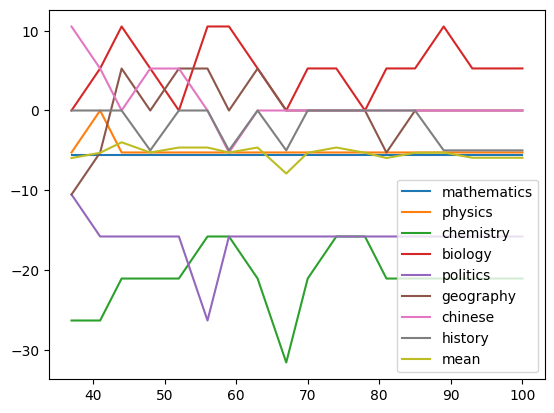

In [4]:
process("/home/pika/Downloads/first/ceval_gen_first_16").T.plot()

<Axes: >

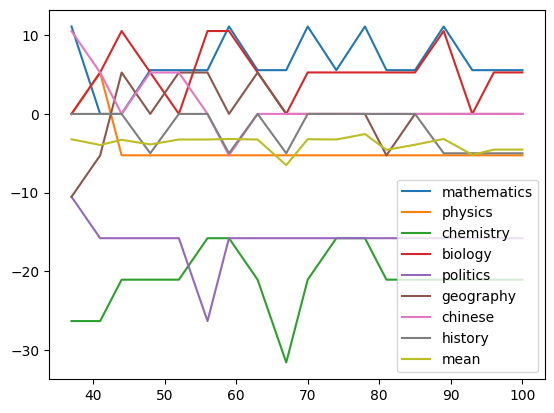

In [5]:
process("/home/pika/Downloads/first/ceval_gen_first_128").T.plot()

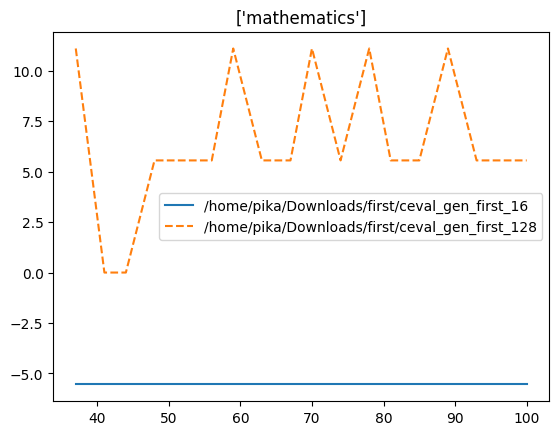

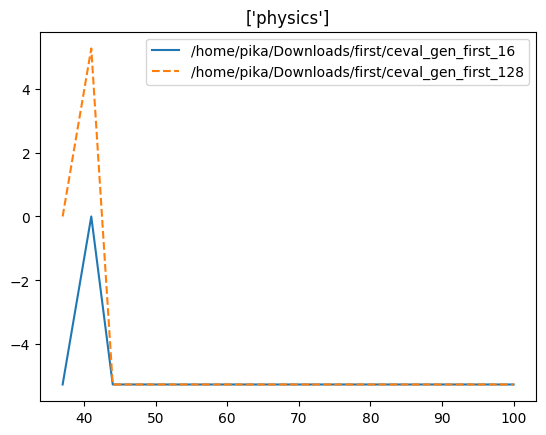

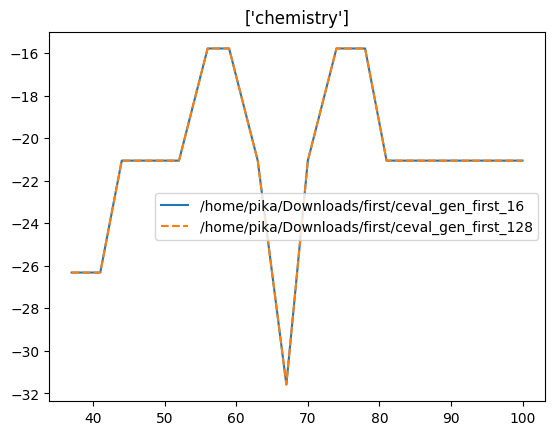

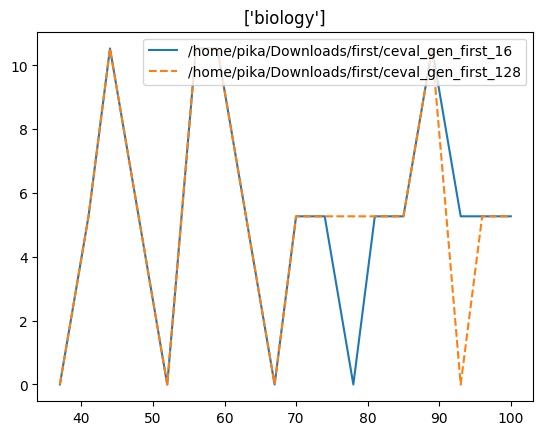

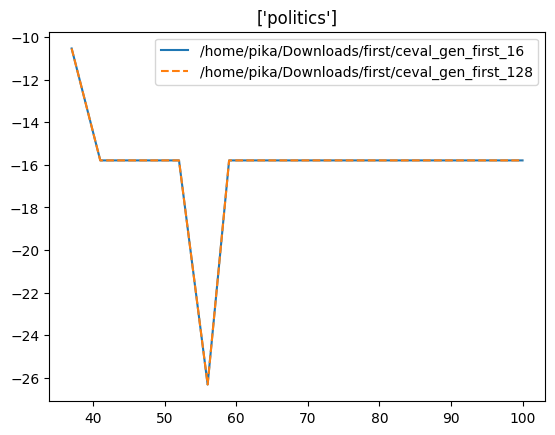

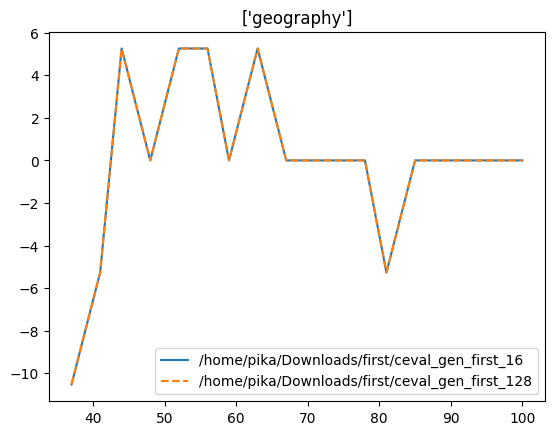

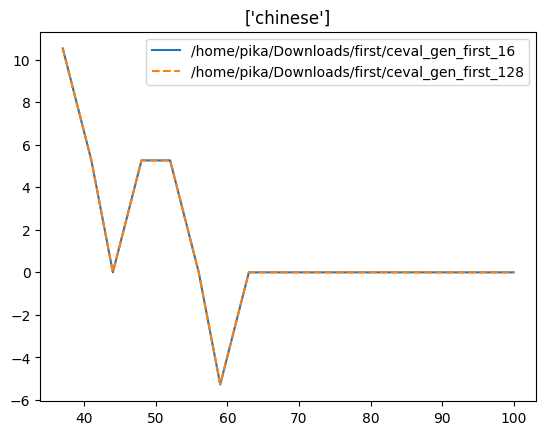

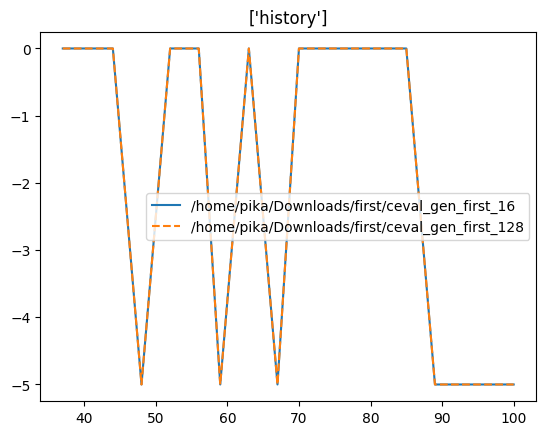

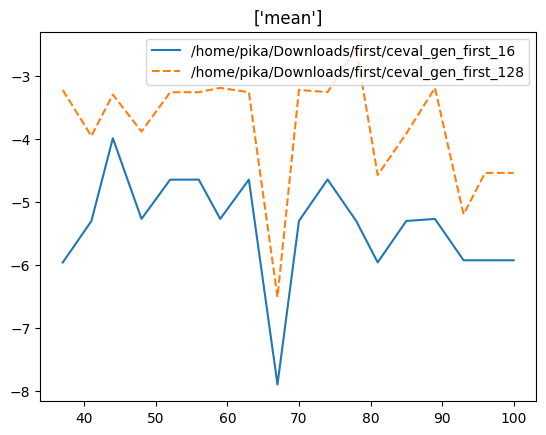

In [29]:
draw_2(["/home/pika/Downloads/first/ceval_gen_first_16","/home/pika/Downloads/first/ceval_gen_first_128"])

<Axes: >

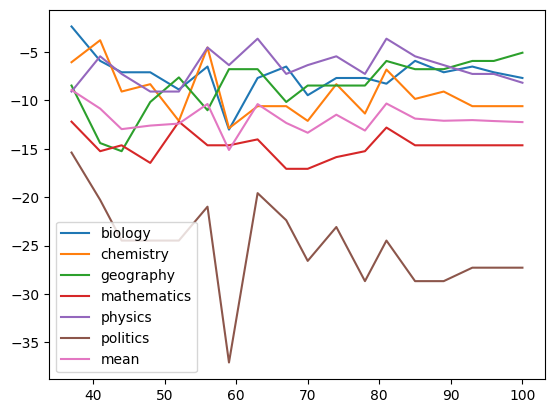

In [9]:
process("/home/pika/Downloads/first/cmmlu_gen_first_16").T.plot()

<Axes: >

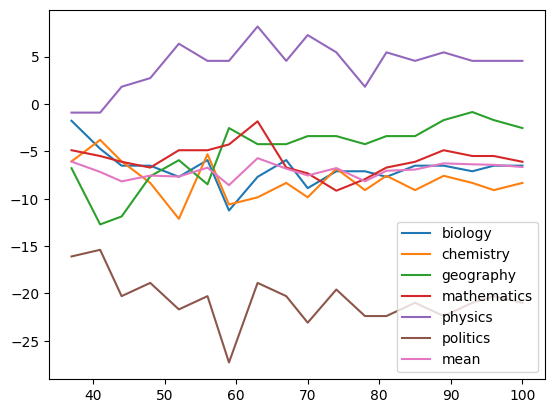

In [10]:
process("/home/pika/Downloads/first/cmmlu_gen_first_128").T.plot()

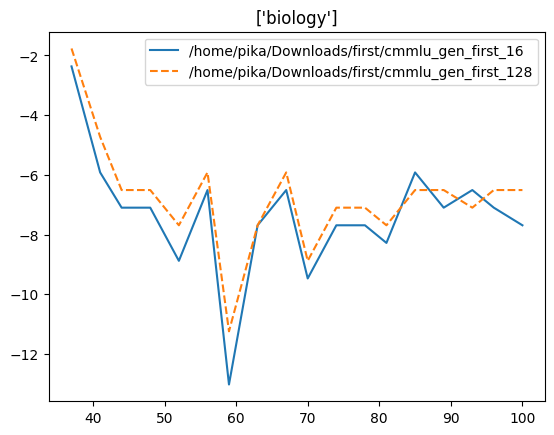

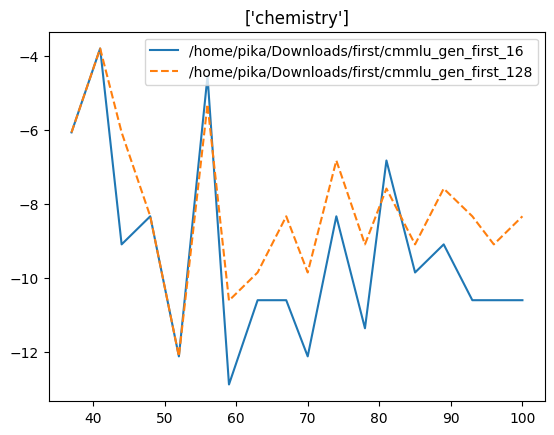

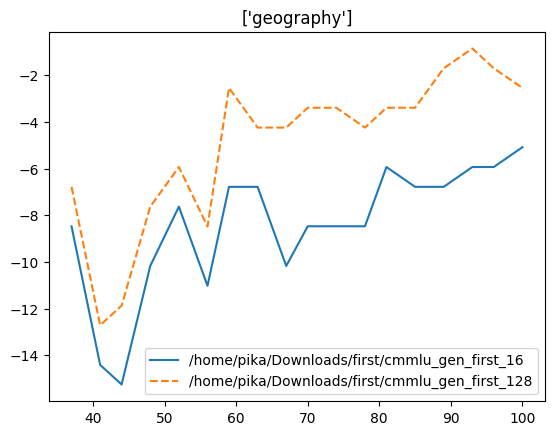

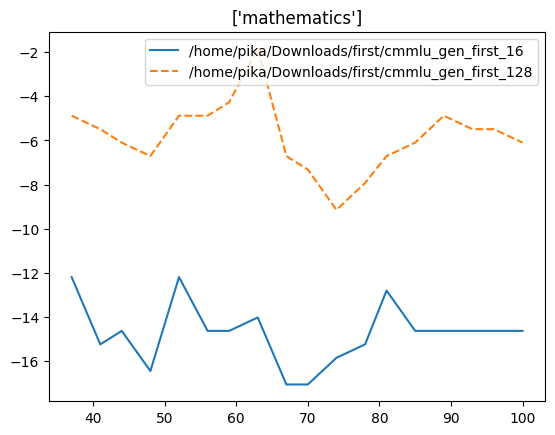

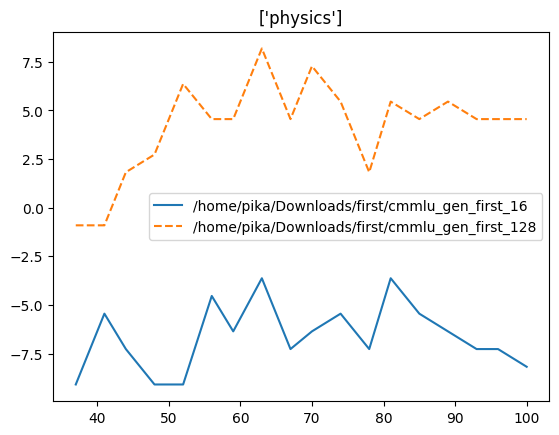

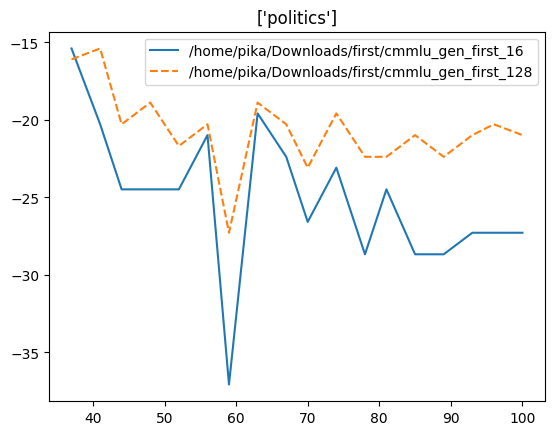

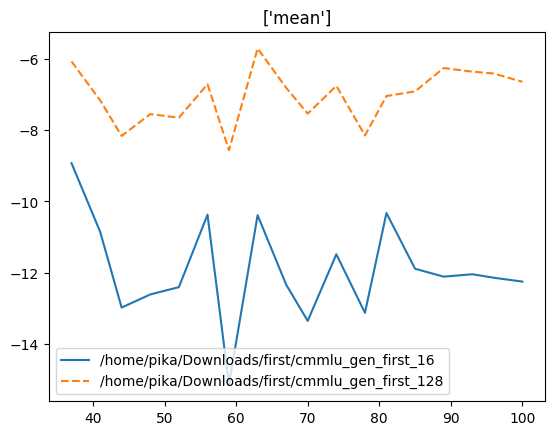

In [11]:
draw_2(["/home/pika/Downloads/first/cmmlu_gen_first_16","/home/pika/Downloads/first/cmmlu_gen_first_128"])

## 第2次训练：使用垂类数据+近似1:1的通用数据训练1个epoch

<Axes: >

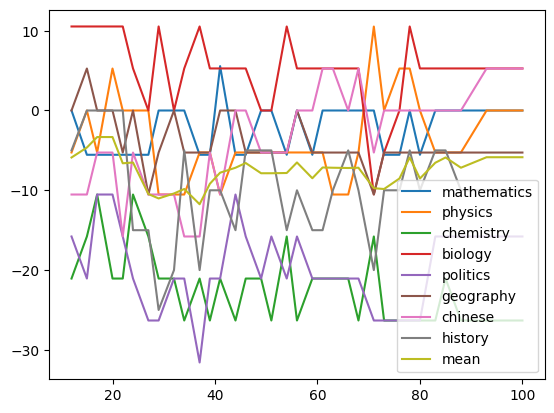

In [12]:
process("/home/pika/Downloads/second/ceval_gen_first_16").T.plot()

<Axes: >

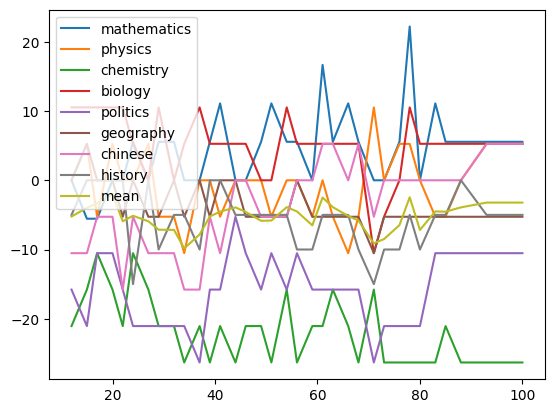

In [13]:
process("/home/pika/Downloads/second/ceval_gen_first_128").T.plot()

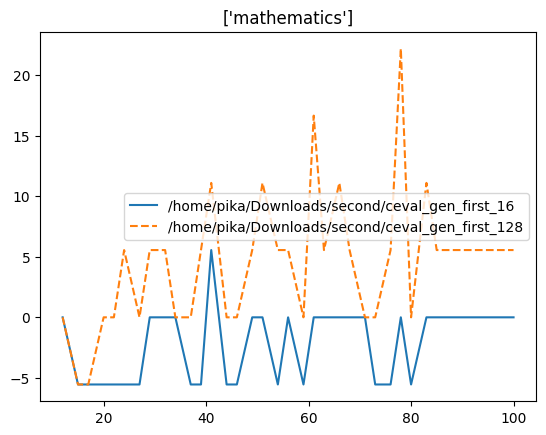

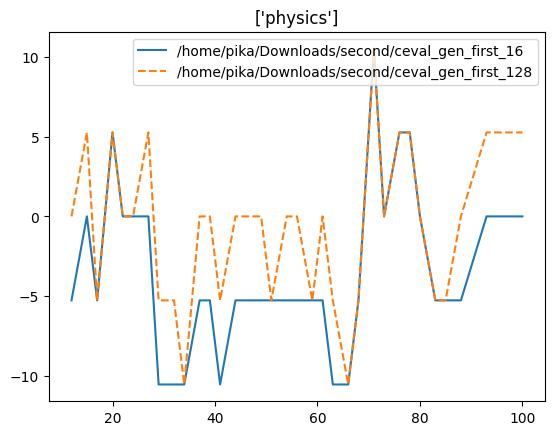

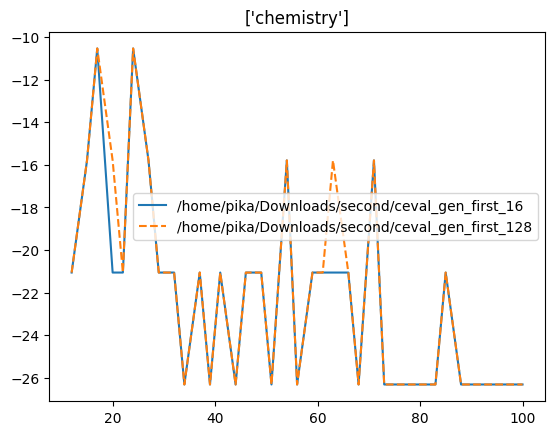

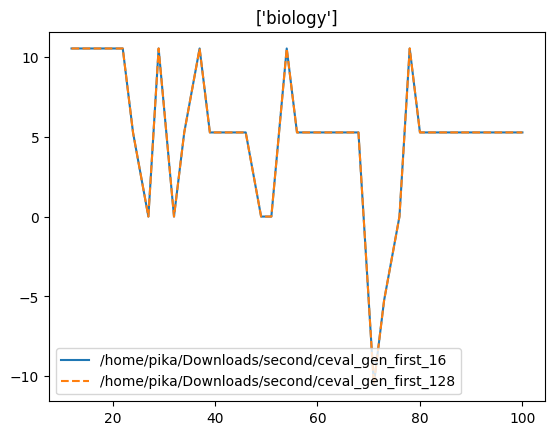

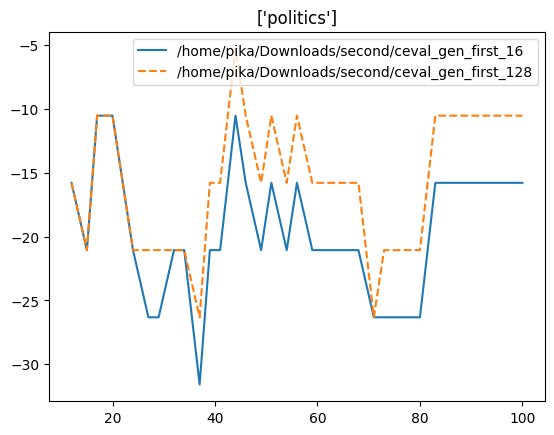

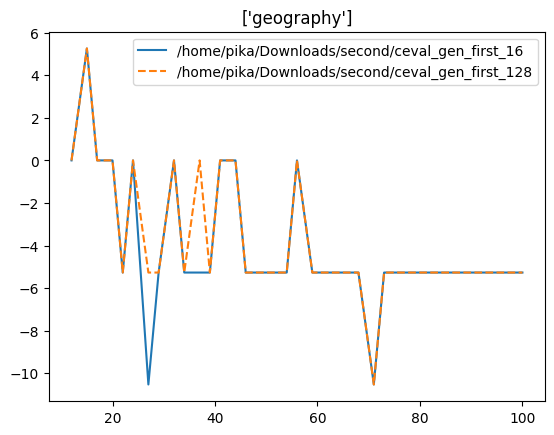

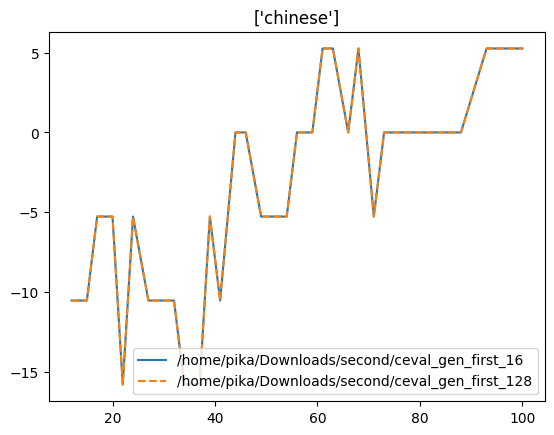

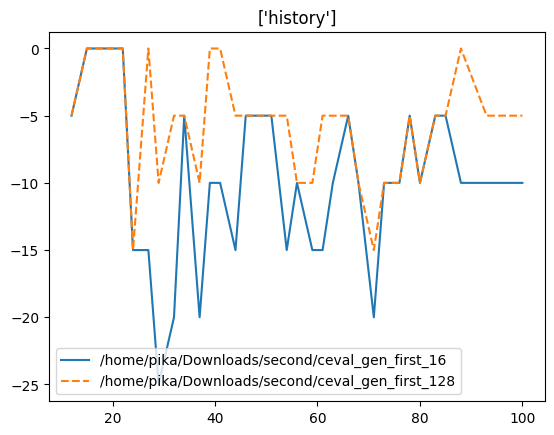

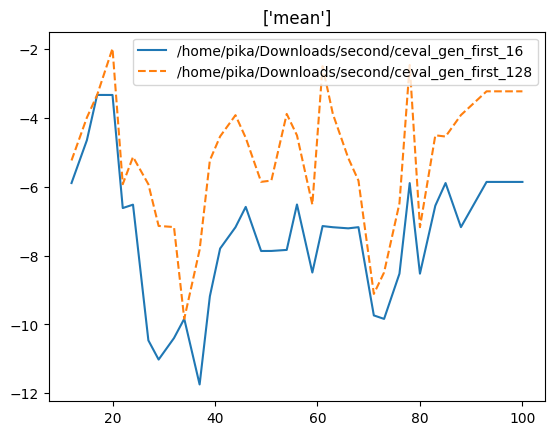

In [14]:
draw_2(["/home/pika/Downloads/second/ceval_gen_first_16","/home/pika/Downloads/second/ceval_gen_first_128"])

<Axes: >

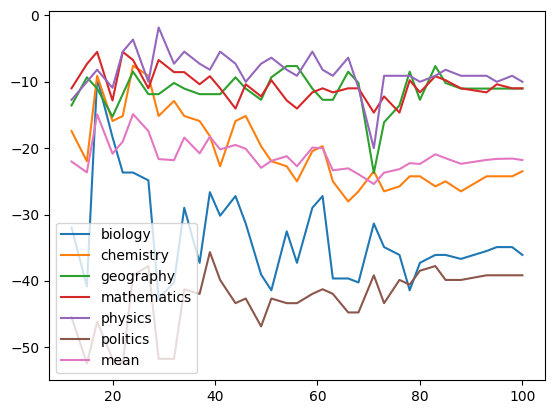

In [15]:
process("/home/pika/Downloads/second/cmmlu_gen_first_16").T.plot()

<Axes: >

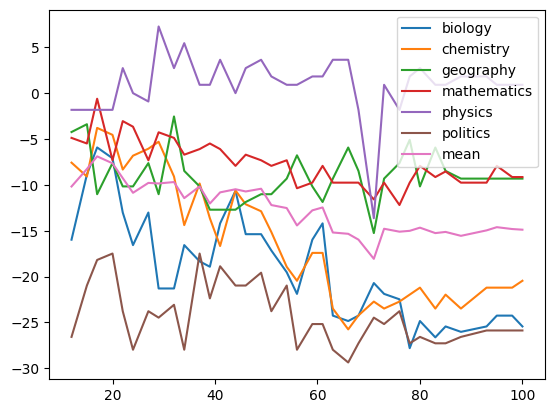

In [16]:
process("/home/pika/Downloads/second/cmmlu_gen_first_128").T.plot()

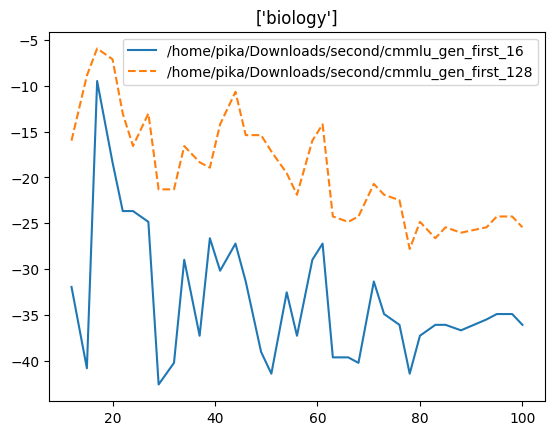

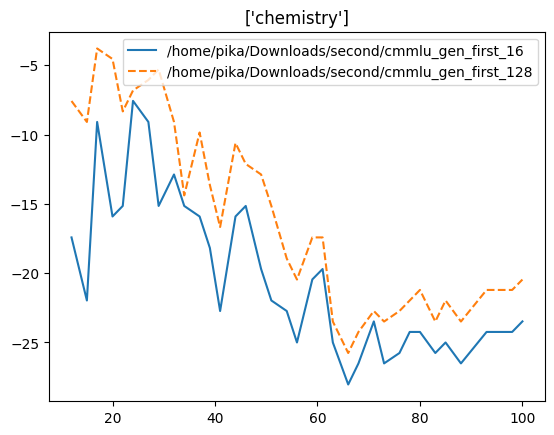

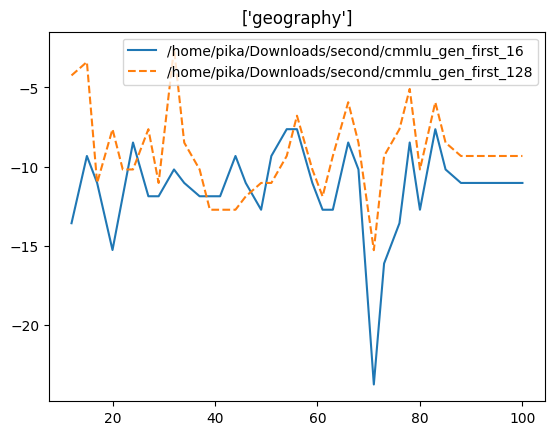

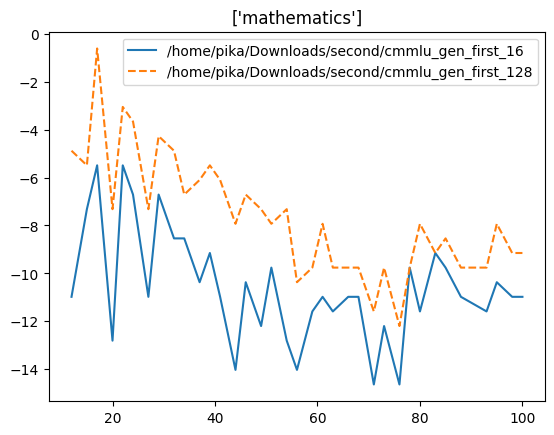

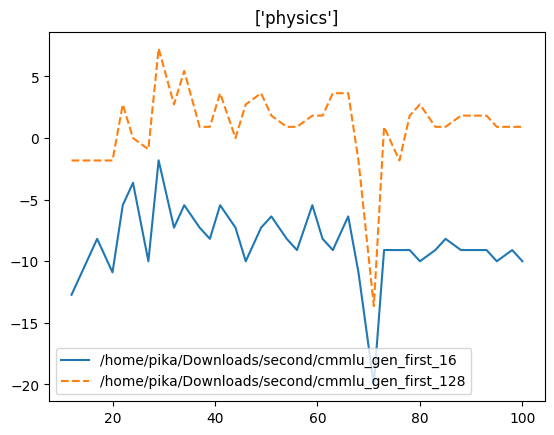

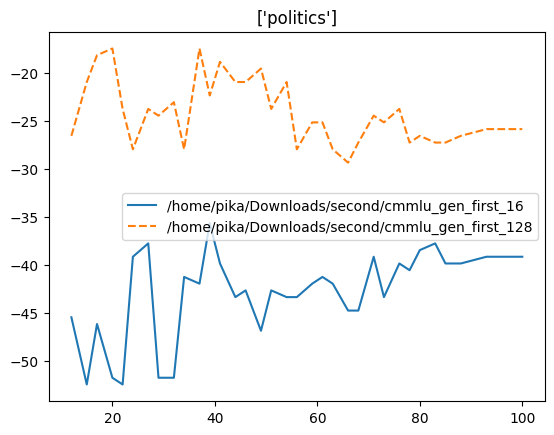

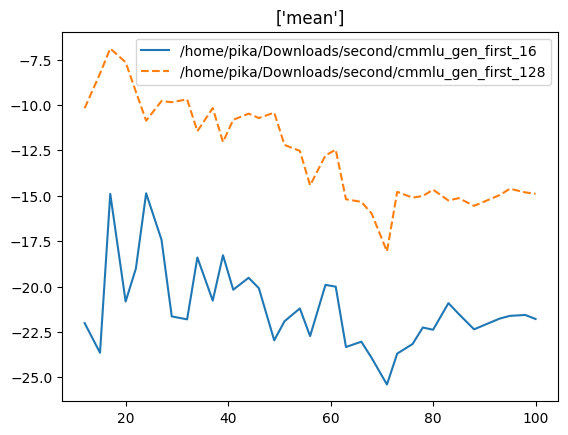

In [17]:
draw_2("/home/pika/Downloads/second/cmmlu_gen_first_16","/home/pika/Downloads/second/cmmlu_gen_first_128")

## 第1次和第2次的比较

整体而言，第2次训练的效果抖动更大，第1次训练的效果更好。

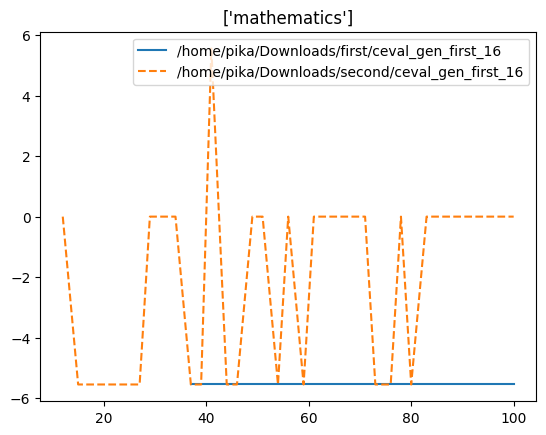

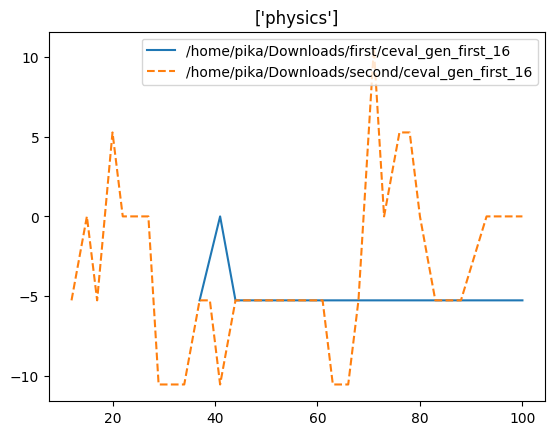

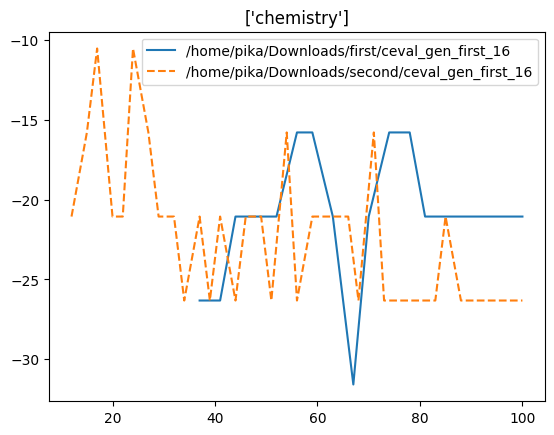

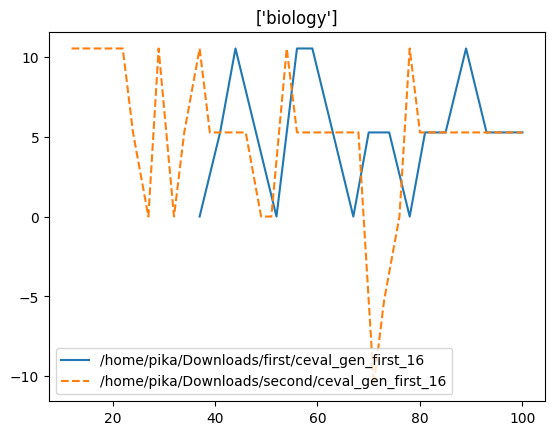

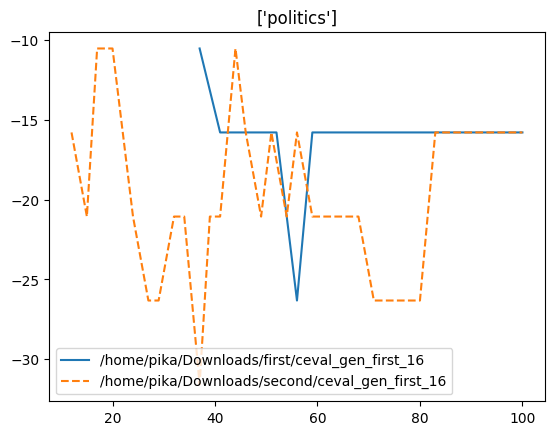

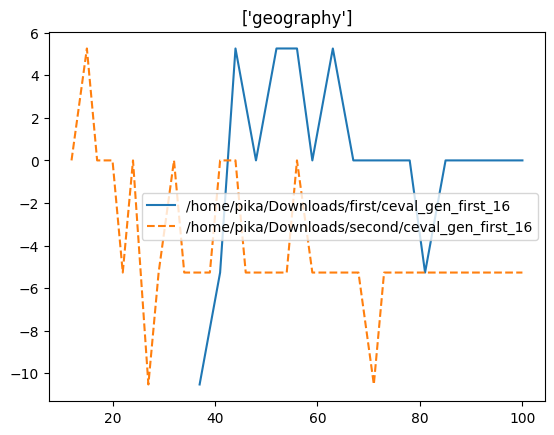

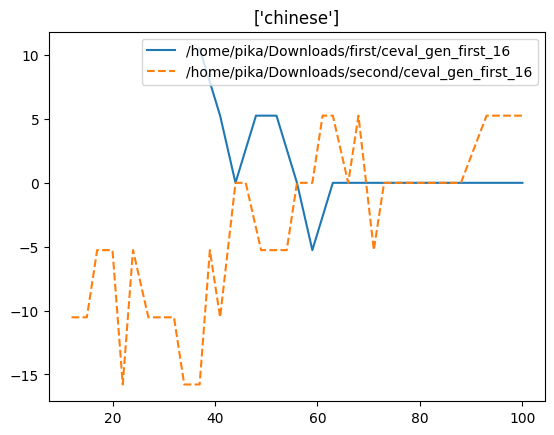

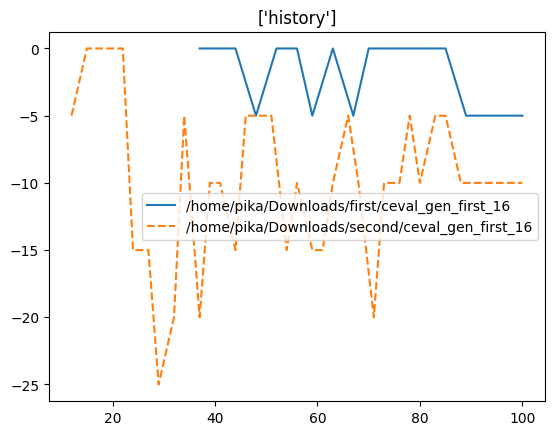

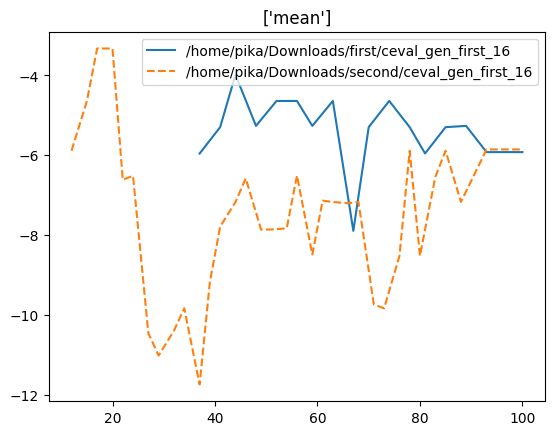

In [18]:
draw_2("/home/pika/Downloads/first/ceval_gen_first_16","/home/pika/Downloads/second/ceval_gen_first_16")

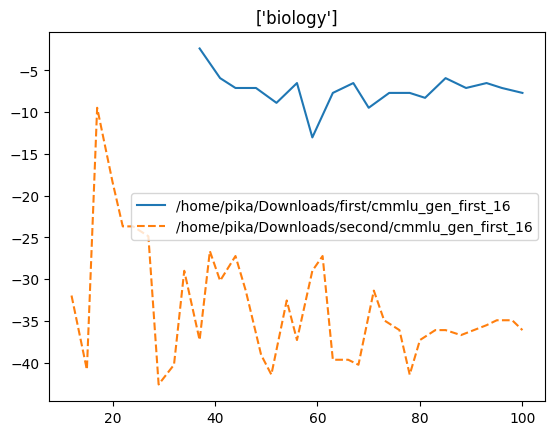

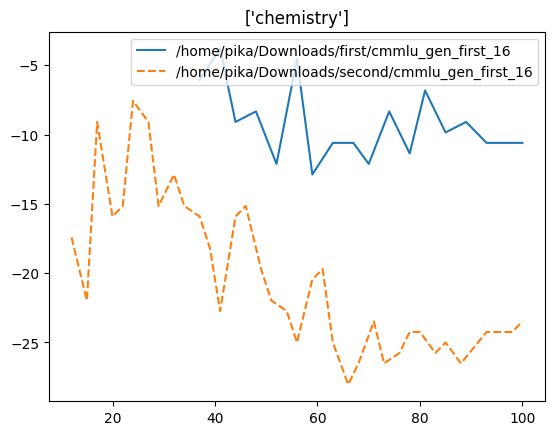

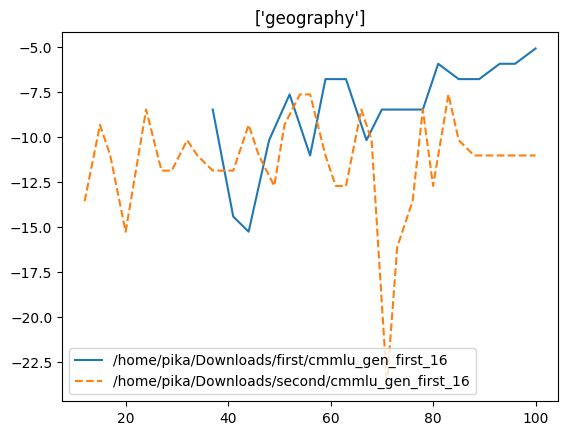

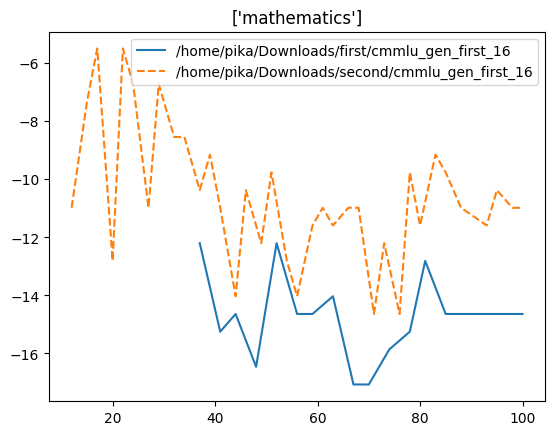

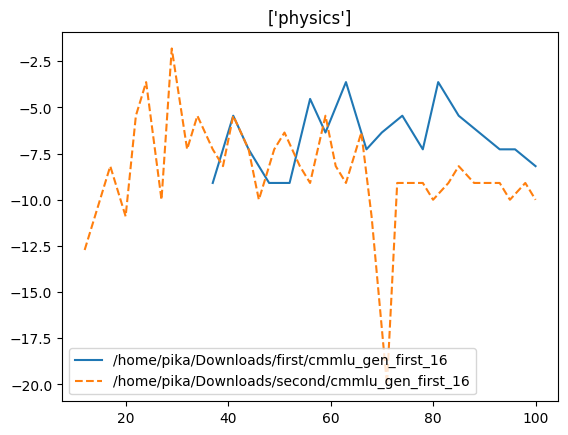

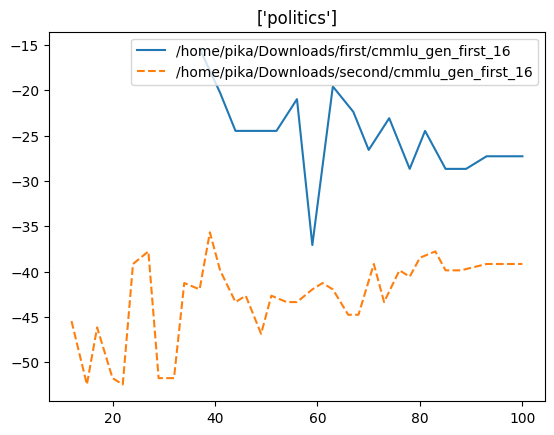

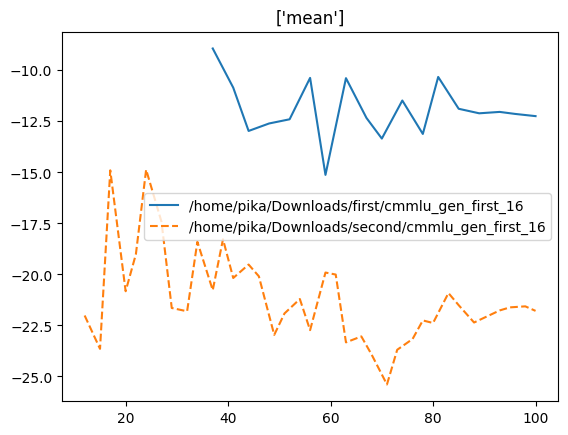

In [19]:
draw_2("/home/pika/Downloads/first/cmmlu_gen_first_16","/home/pika/Downloads/second/cmmlu_gen_first_16")

## 第3次训练：在第2次训练的checkpoint上使用垂类数据继续训练1个epoch

效果比前两次要好，而且生成tokens数量对评测结果的影响更小。

<Axes: >

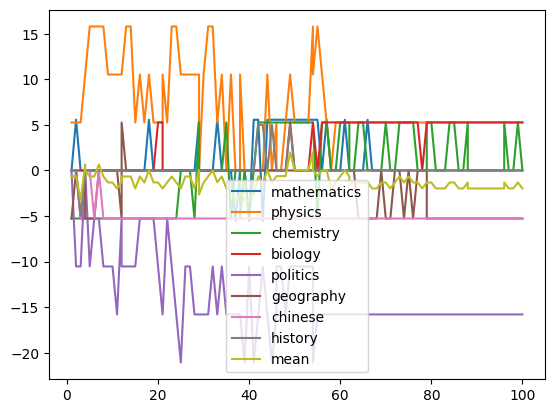

In [20]:
process("/home/pika/Downloads/third/ceval_gen_first_16").T.plot()

<Axes: >

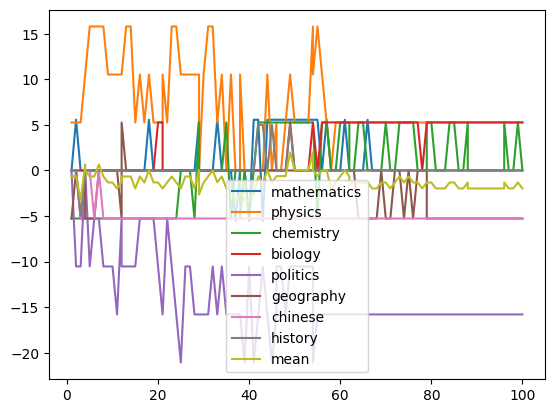

In [21]:
process("/home/pika/Downloads/third/ceval_gen_first_128").T.plot()

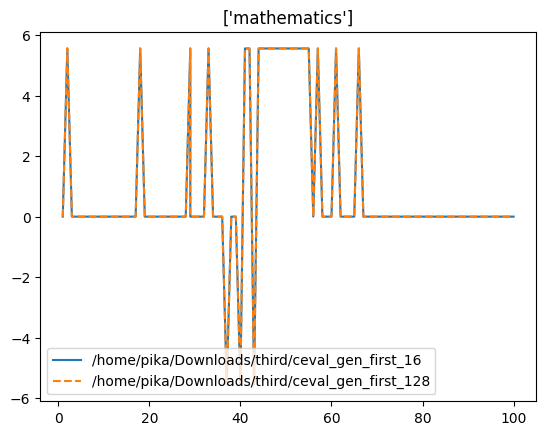

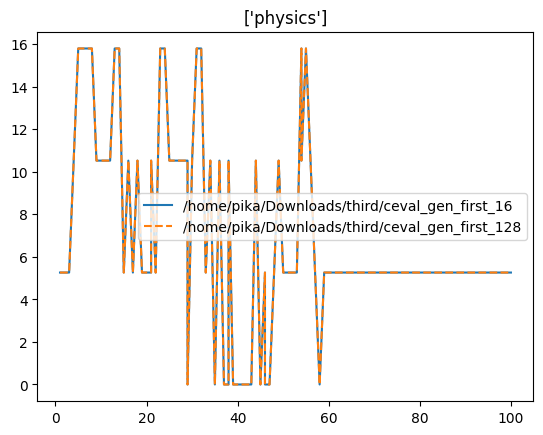

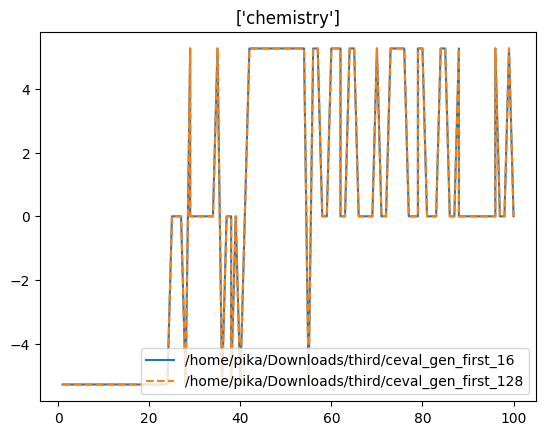

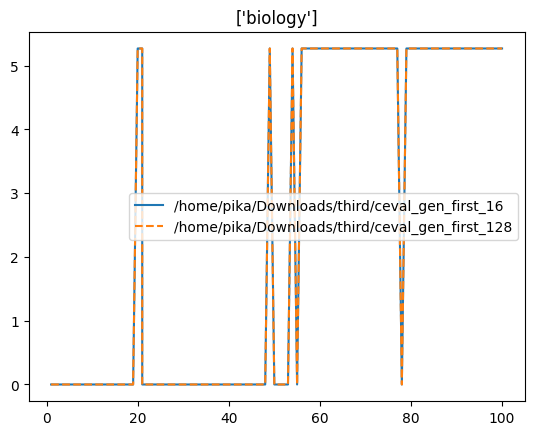

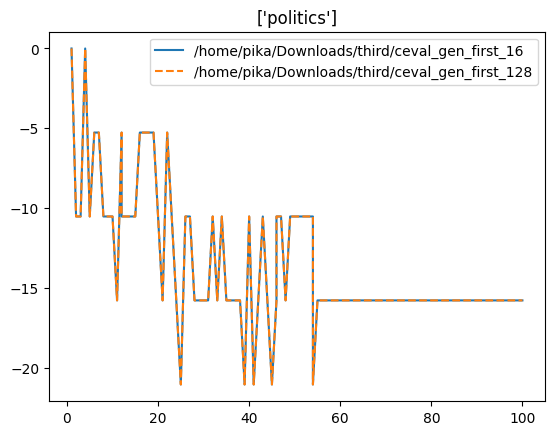

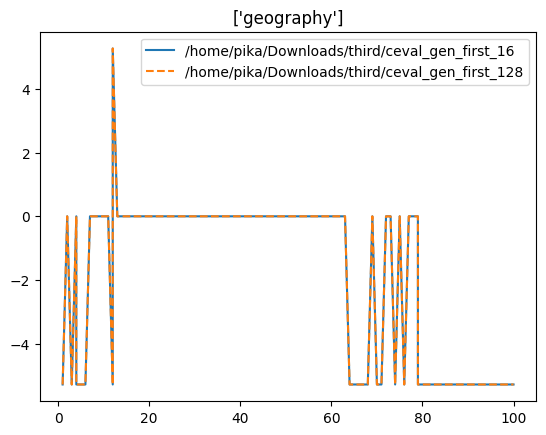

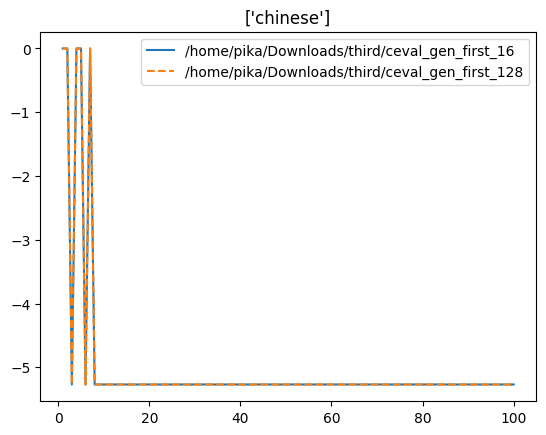

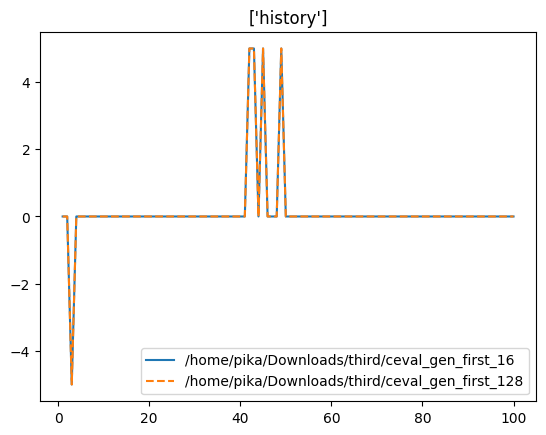

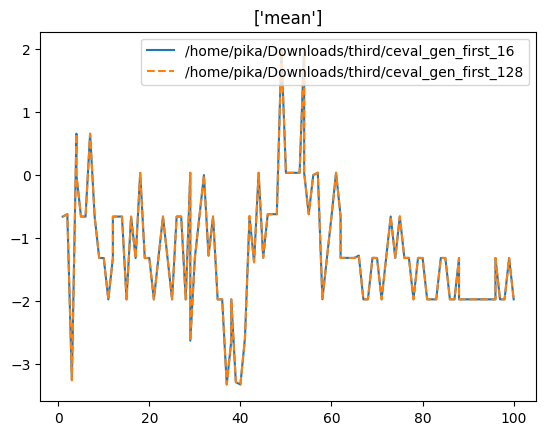

In [25]:
draw_2(["/home/pika/Downloads/third/ceval_gen_first_16","/home/pika/Downloads/third/ceval_gen_first_128"])

<Axes: >

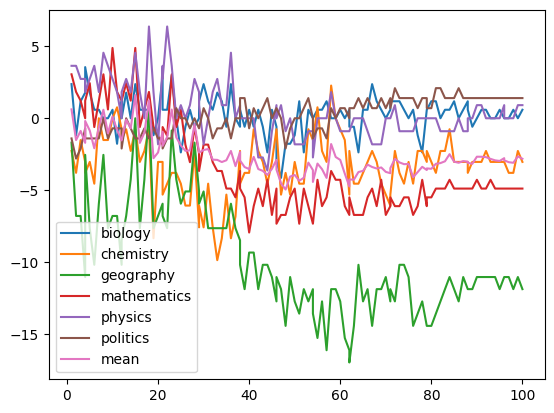

In [22]:
process("/home/pika/Downloads/third/cmmlu_gen_first_16").T.plot()

<Axes: >

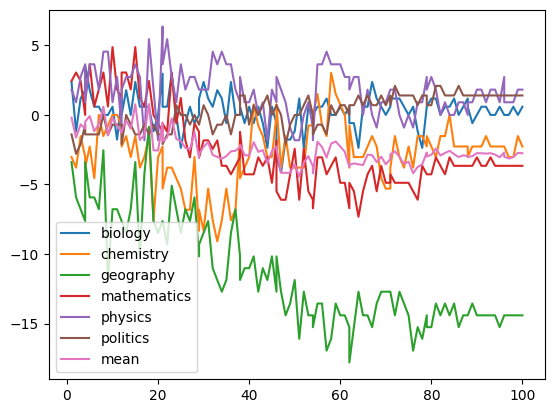

In [23]:
process("/home/pika/Downloads/third/cmmlu_gen_first_128").T.plot()

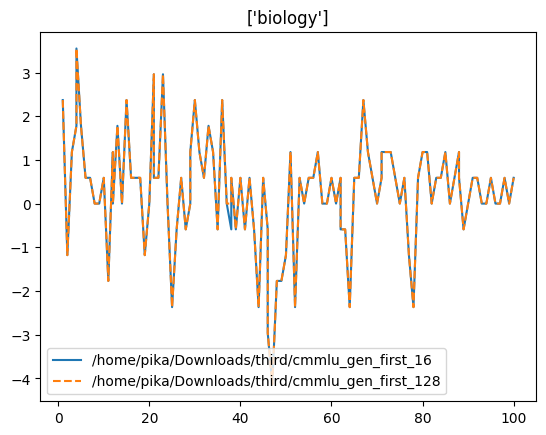

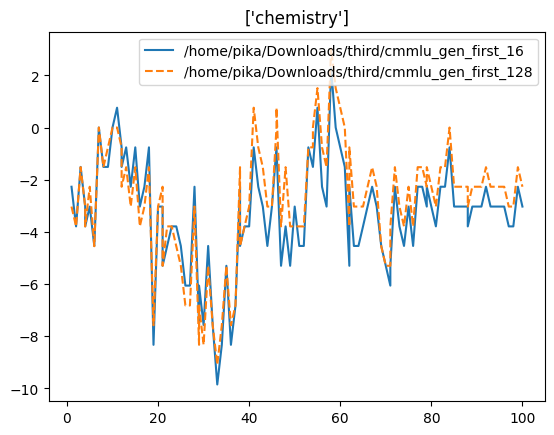

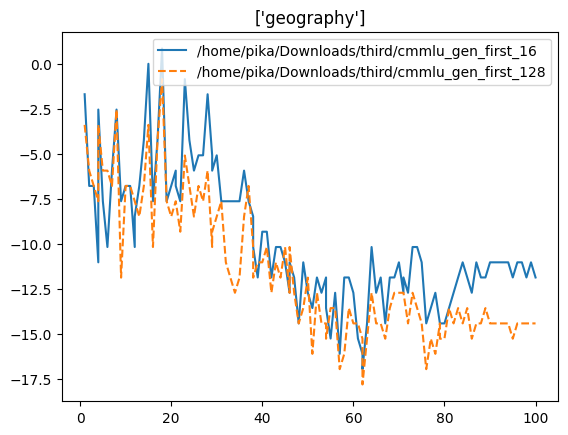

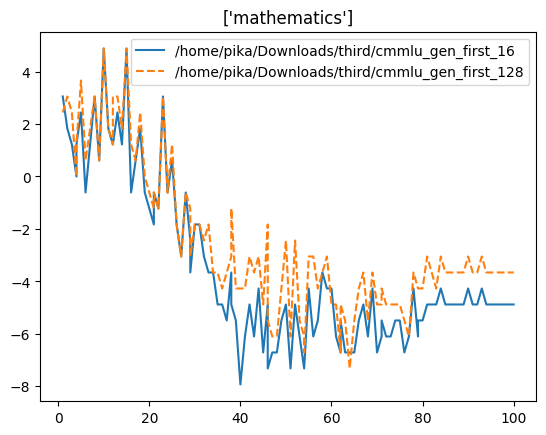

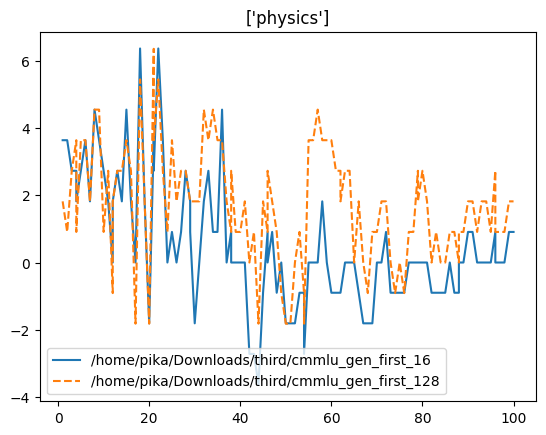

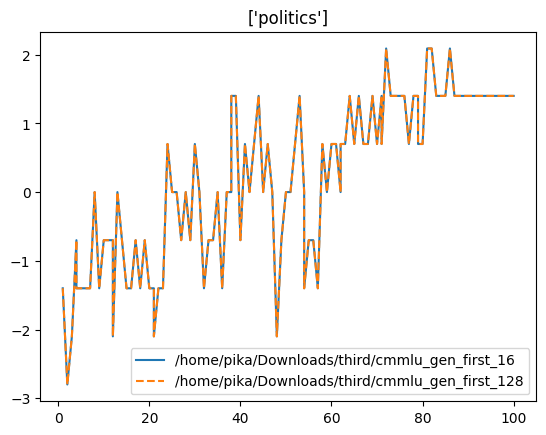

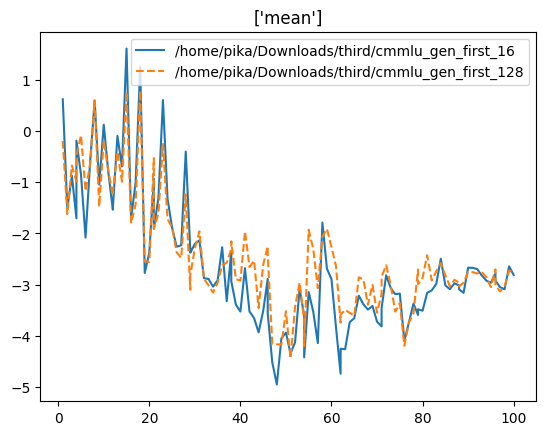

In [26]:
draw_2(["/home/pika/Downloads/third/cmmlu_gen_first_16","/home/pika/Downloads/third/cmmlu_gen_first_128"])

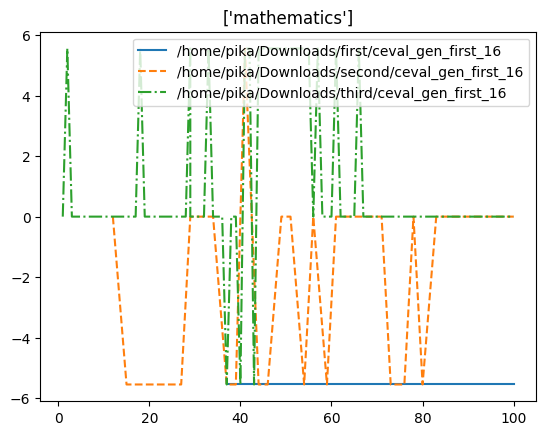

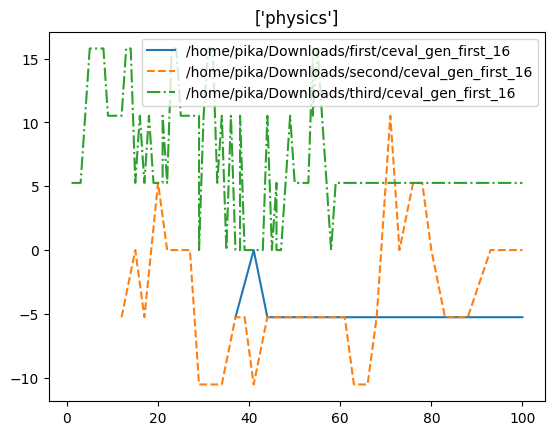

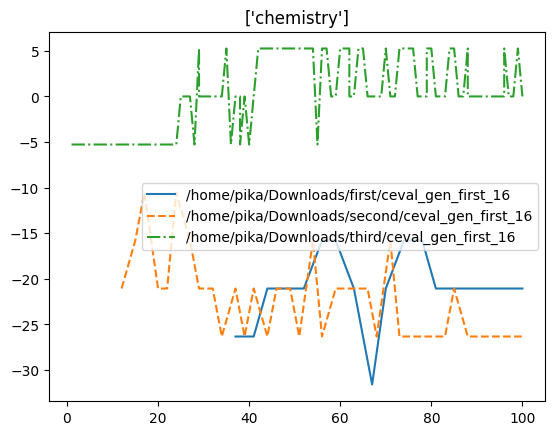

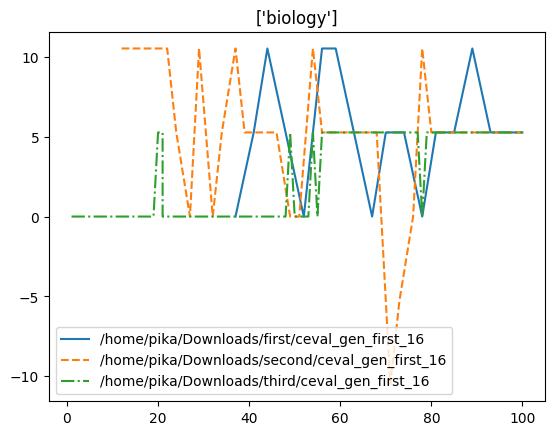

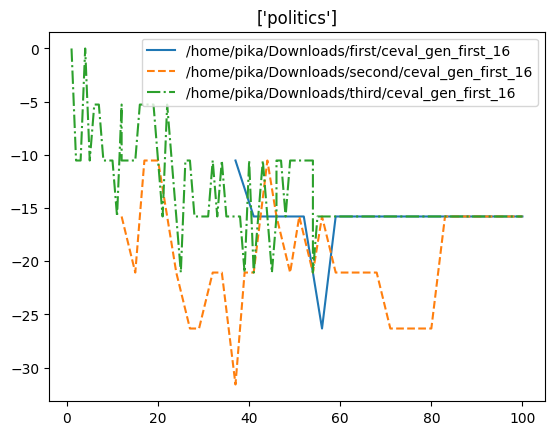

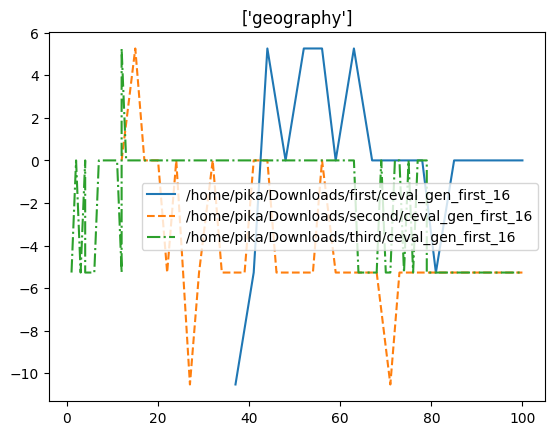

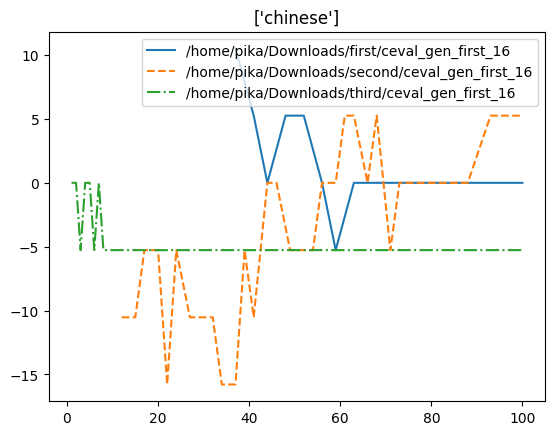

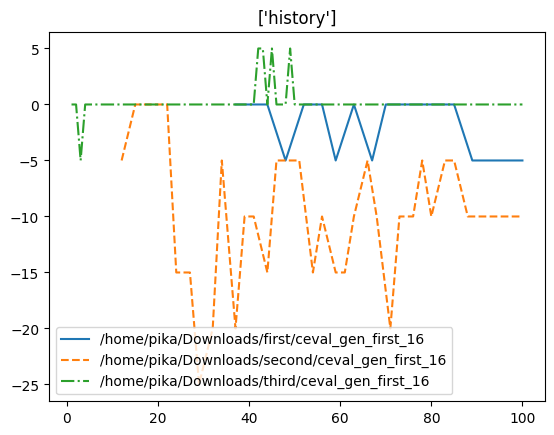

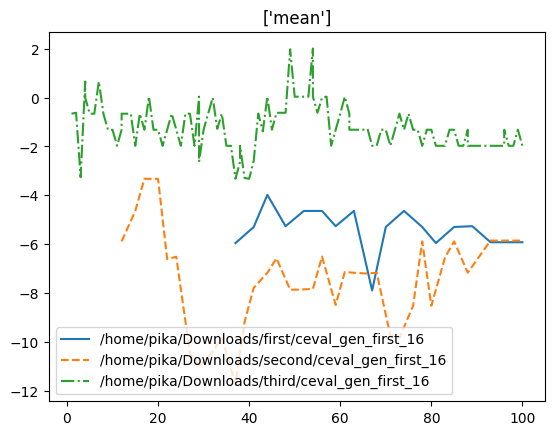

In [30]:
draw_2(["/home/pika/Downloads/first/ceval_gen_first_16","/home/pika/Downloads/second/ceval_gen_first_16","/home/pika/Downloads/third/ceval_gen_first_16"])

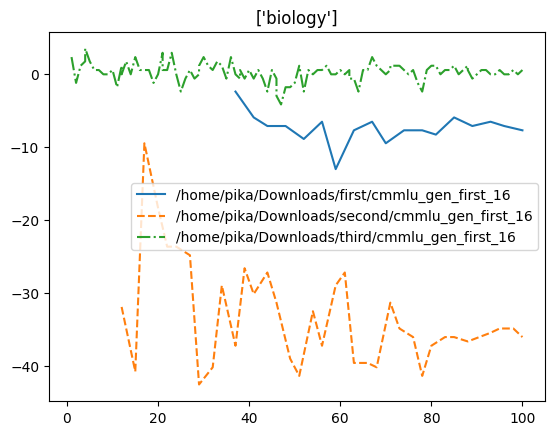

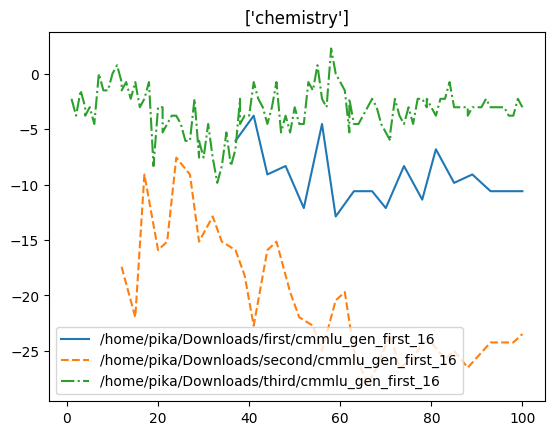

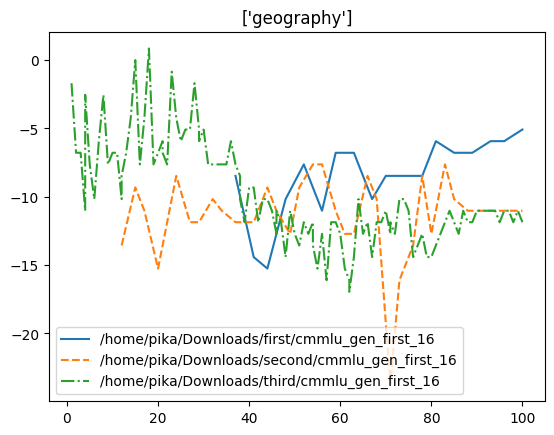

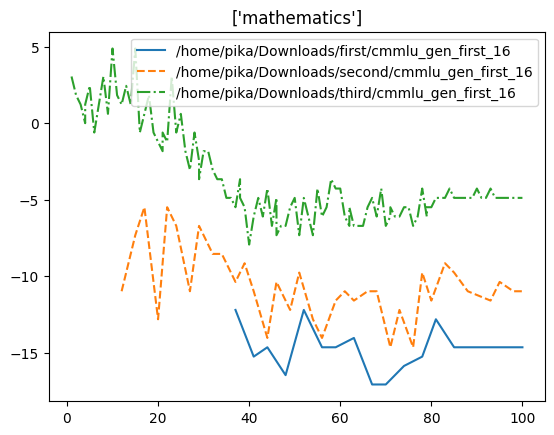

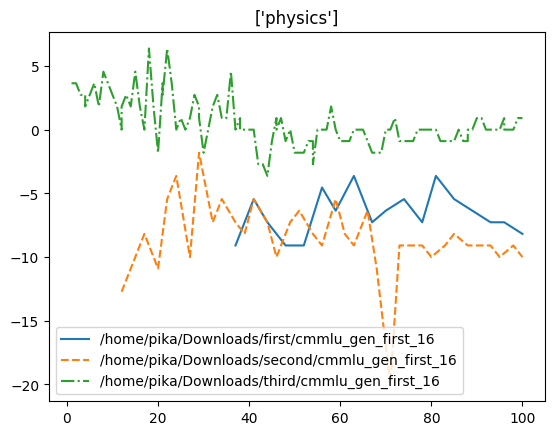

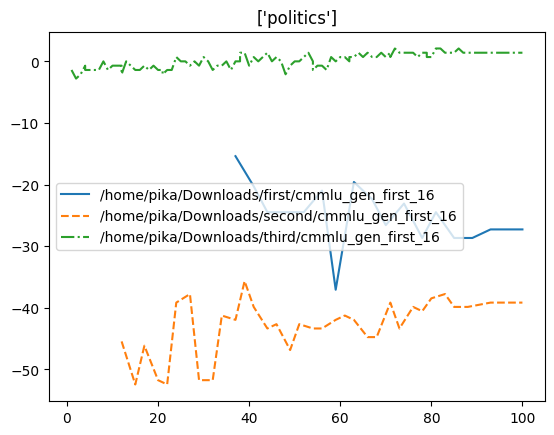

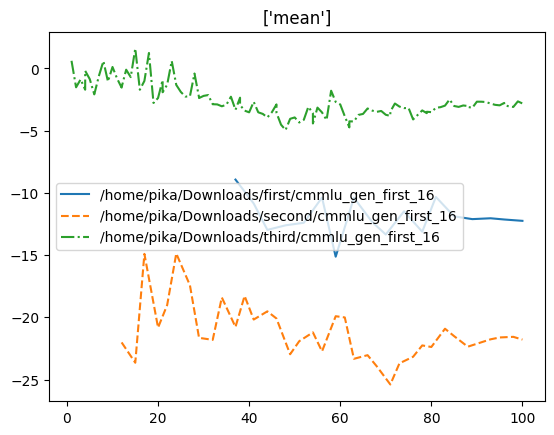

In [31]:
draw_2(["/home/pika/Downloads/first/cmmlu_gen_first_16","/home/pika/Downloads/second/cmmlu_gen_first_16","/home/pika/Downloads/third/cmmlu_gen_first_16"])